In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# prepare dataset

X_numpy, y_numpy= datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [3]:
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

In [4]:
y=y.view(y.shape[0],1)

In [5]:
n_samples, n_features= X.shape

In [6]:
# model 

In [7]:
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)

In [8]:
# loss and optimization
learning_rate=.01
criterion = nn.MSELoss()
optimizer= torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
# training loop
num_epoch=100
for epoch in range(num_epoch):
    #forward pass and loss
    y_predicted = model(X)
    loss= criterion(y_predicted,y)
    # backward pass
    
    loss.backward()
    
    #update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 ==0:
        print(f'epoch:{epoch+1}, loss={loss.item()}:.4f')

epoch:10, loss=3804.669921875:.4f
epoch:20, loss=2853.870849609375:.4f
epoch:30, loss=2164.892578125:.4f
epoch:40, loss=1665.1597900390625:.4f
epoch:50, loss=1302.37060546875:.4f
epoch:60, loss=1038.7835693359375:.4f
epoch:70, loss=847.1287231445312:.4f
epoch:80, loss=707.679443359375:.4f
epoch:90, loss=606.1513671875:.4f
epoch:100, loss=532.1889038085938:.4f


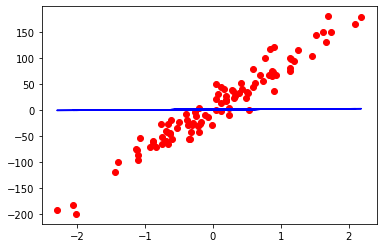

In [11]:
#plot
predicted= model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted,'b')
plt.show()